In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()
#is_canceled is our response variable

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()
#notice a lot of missing values in company variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Cleaning

In [5]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [6]:
df=df.drop('company',axis=1)
df.agent.fillna(0,inplace=True)
df.children.fillna(0,inplace=True)
df.country.fillna('UNK',inplace=True)

In [7]:
df[df.duplicated(keep=False)].shape

(40176, 31)

In [8]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.shape

(87389, 31)

### EDA: Data Visulization

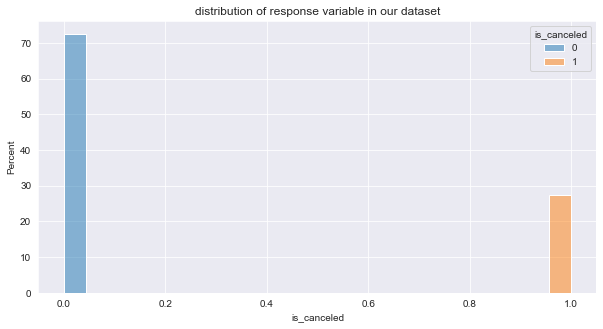

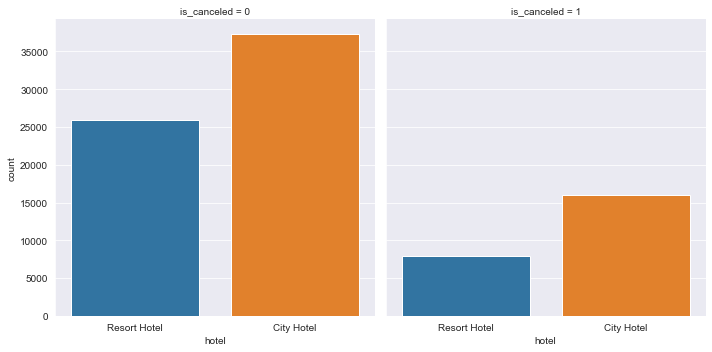

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.histplot(x=df.is_canceled,ax=ax,stat='percent',hue='is_canceled',data=df);
ax.set_title('distribution of response variable in our dataset');
sns.catplot(x='hotel',data=df,col='is_canceled',kind='count');

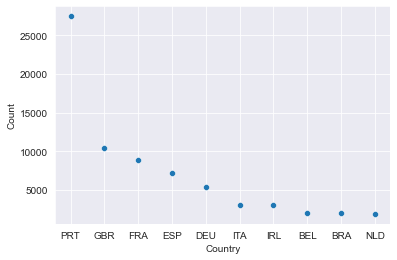

In [10]:
plot1=df.country.value_counts()[:10].reset_index()
plot1.rename({'index': 'Country', 'country': 'Count'}, axis=1, inplace=True)
p1=sns.scatterplot(x='Country',y='Count',data=plot1)

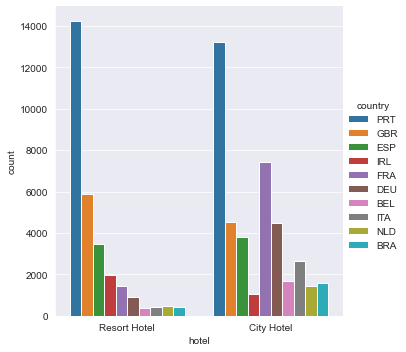

In [11]:
options=plot1.Country.values.tolist()
plot2=df[df['country'].isin(options)]
sns.catplot(x='hotel',data=plot2,hue='country',kind='count');

In [12]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

You should consider upgrading via the '/Users/zheshao/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/zheshao/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


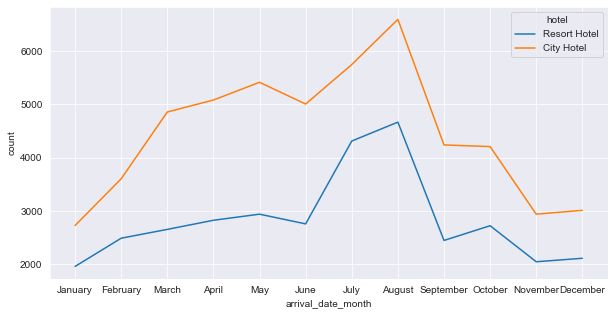

In [13]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
plot3=df.groupby(['arrival_date_month'])['hotel'].value_counts().to_frame(name = 'count').reset_index()
plot3=Sort_Dataframeby_MonthandNumeric_cols(df = plot3, monthcolumn='arrival_date_month',numericcolumn='count')
fig,ax=plt.subplots(1,1,figsize=(10,5))
p2=sns.lineplot(x='arrival_date_month',y='count',hue='hotel',data=plot3,ax=ax)

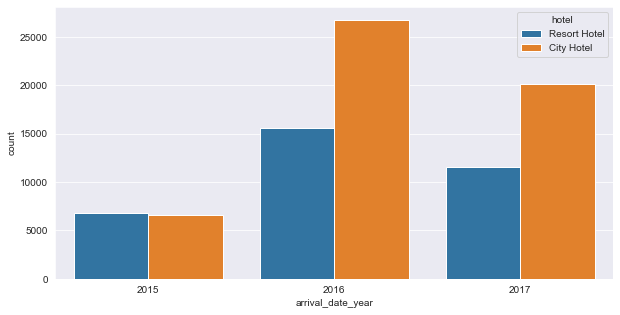

In [14]:
plot4=df.groupby(['arrival_date_year'])['hotel'].value_counts().to_frame(name = 'count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
p3=sns.barplot(x='arrival_date_year',y='count',hue='hotel',data=plot4,ax=ax)

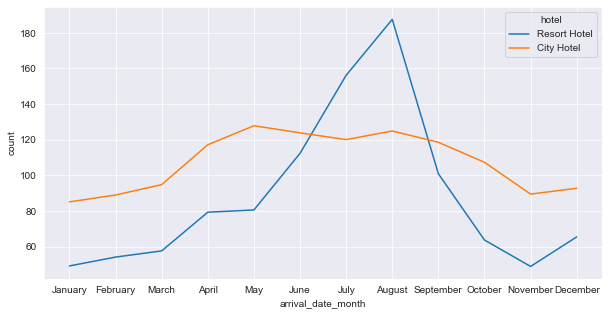

In [15]:
plot5=df.groupby(['arrival_date_month','hotel'])['adr'].mean().to_frame(name = 'count').reset_index()
plot5=Sort_Dataframeby_MonthandNumeric_cols(df = plot5, monthcolumn='arrival_date_month',numericcolumn='count')
fig,ax=plt.subplots(1,1,figsize=(10,5))
plot5.rename({'Count': 'mean_price'}, axis=1, inplace=True)
p4=sns.lineplot(x='arrival_date_month',y='count',hue='hotel',data=plot5,ax=ax)

### transform variables

In [16]:
df.info()
# we want to encoding the categorical varaible

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87389 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87389 non-null  object 
 1   is_canceled                     87389 non-null  int64  
 2   lead_time                       87389 non-null  int64  
 3   arrival_date_year               87389 non-null  int64  
 4   arrival_date_month              87389 non-null  object 
 5   arrival_date_week_number        87389 non-null  int64  
 6   arrival_date_day_of_month       87389 non-null  int64  
 7   stays_in_weekend_nights         87389 non-null  int64  
 8   stays_in_week_nights            87389 non-null  int64  
 9   adults                          87389 non-null  int64  
 10  children                        87389 non-null  float64
 11  babies                          87389 non-null  int64  
 12  meal                           

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
#需要标准化的数据
df_1 = df[['is_canceled', 'lead_time', 'arrival_date_year','arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights','stays_in_week_nights', 
       'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list',
       'adr','required_car_parking_spaces', 'total_of_special_requests']]
#需要另外处理的文本型数据
df_2 = df[['hotel', 'meal', 'market_segment', 'distribution_channel', 'arrival_date_month', 
           'country', 'reserved_room_type','assigned_room_type', 'deposit_type','customer_type',
           'reservation_status', 'reservation_status_date']]

In [19]:
df_1.reset_index(drop=True, inplace=True)
df_2.reset_index(drop=True, inplace=True)

In [20]:
#对没有顺序和关系的数据用dummy处理
df_2 = pd.get_dummies(df_2, columns=['hotel','meal','market_segment','distribution_channel',
                                     'reserved_room_type','assigned_room_type','deposit_type',
                                     'customer_type','reservation_status'])

In [21]:
#对月份和国家单独用labelencoder
from sklearn.preprocessing import LabelEncoder
df_2[['arrival_date_month','country']] = df_2[['arrival_date_month','country']].apply(LabelEncoder().fit_transform)
df_2.head()

,arrival_date_month,country,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,5,135,2015-07-01,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,5,135,2015-07-01,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,5,59,2015-07-02,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,5,59,2015-07-02,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,5,59,2015-07-03,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [22]:
#对reservation_status_date拆分为年月日三列,并去掉该列
import datetime
df_2['reservation_status_date']= pd.to_datetime(df_2['reservation_status_date']) 
df_2['reservation_status_date_year'] = df_2['reservation_status_date'].dt.year 
df_2['reservation_status_date_month'] = df_2['reservation_status_date'].dt.month 
df_2['reservation_status_date_day'] = df_2['reservation_status_date'].dt.day
df_2.drop('reservation_status_date',axis=1,inplace=True)

In [23]:
df_2.head()

,arrival_date_month,country,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,...,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,5,135,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,2015,7,1
1,5,135,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,2015,7,1
2,5,59,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,2015,7,2
3,5,59,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,2015,7,2
4,5,59,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,2015,7,3


In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87389 entries, 0 to 87388
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   arrival_date_month              87389 non-null  int64
 1   country                         87389 non-null  int64
 2   hotel_City Hotel                87389 non-null  uint8
 3   hotel_Resort Hotel              87389 non-null  uint8
 4   meal_BB                         87389 non-null  uint8
 5   meal_FB                         87389 non-null  uint8
 6   meal_HB                         87389 non-null  uint8
 7   meal_SC                         87389 non-null  uint8
 8   meal_Undefined                  87389 non-null  uint8
 9   market_segment_Aviation         87389 non-null  uint8
 10  market_segment_Complementary    87389 non-null  uint8
 11  market_segment_Corporate        87389 non-null  uint8
 12  market_segment_Direct           87389 non-null  uint8
 13  m

In [25]:
df = pd.concat([df_1,df_2],axis=1)
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,1,0,0,1,0,2015,7,1
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,1,0,0,1,0,2015,7,1
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,1,0,0,1,0,2015,7,2
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,1,0,0,1,0,2015,7,2
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,1,0,0,1,0,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87384,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,1,0,0,1,0,2017,9,6
87385,0,102,2017,35,31,2,5,3,0.0,0,...,0,0,1,0,0,1,0,2017,9,7
87386,0,34,2017,35,31,2,5,2,0.0,0,...,0,0,1,0,0,1,0,2017,9,7
87387,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,1,0,0,1,0,2017,9,7


### 开始训练模型

In [26]:
X=df.drop('is_canceled',axis=1)
y=df['is_canceled']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=123)

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummyc = DummyClassifier().fit(X_train, y_train)
#cross validation for dummyC
from sklearn.model_selection import cross_val_score
dummyc_rocauc_scores = cross_val_score(dummyc,X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1)
print(dummyc_rocauc_scores)
print(f'{np.mean(dummyc_rocauc_scores) :0.2f} +- {2*np.std(dummyc_rocauc_scores) :0.2f}')

[0.72494279 0.7250534  0.7250534  0.7250534  0.72490082 0.72490082
 0.72490082 0.72490082 0.72490082 0.72490082]
0.72 +- 0.00


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression().fit(X_train, y_train)
    #cross validation logistic
lr_rocauc_scores = cross_val_score(lr,X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1)
print(lr_rocauc_scores)
print(f'{np.mean(lr_rocauc_scores) :0.2f} +- {2*np.std(lr_rocauc_scores) :0.2f}')

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[0.91060259 0.85291425 0.86344217 0.86084834 0.92279524 0.90982606
 0.92645713 0.85566067 0.89273726 0.9231004 ]
0.89 +- 0.06


/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
knn_rocauc_scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1)
print(knn_rocauc_scores)
print(f'{np.mean(knn_rocauc_scores) :0.2f} +- {2*np.std(knn_rocauc_scores) :0.2f}')

[0.80122044 0.79676533 0.79050961 0.80103753 0.79798596 0.79722307
 0.79737565 0.79005188 0.79401892 0.79325603]
0.80 +- 0.01


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


### 用几种方法改进模型和精度
1.pca降低维度
2.feature selection
3.参数优化

### pca降低维度

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9) # 保证降维后的数据保持90%的信息
pca.fit(X)
X_pca = pca.transform(X)

In [32]:
pca.explained_variance_ratio_

array([0.48805166, 0.2927745 , 0.12254615])

In [33]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca, y, train_size=0.75, test_size=0.25, random_state=123)

In [34]:
from sklearn.dummy import DummyClassifier
dummyc_pca = DummyClassifier().fit(X_train_pca, y_train_pca)
dummyc_acc_scores = cross_val_score(dummyc_pca,X_train_pca,y_train_pca,cv=10,scoring='accuracy',n_jobs=-1)
print(f'{np.mean(dummyc_acc_scores) :0.2f} +- {2*np.std(dummyc_acc_scores) :0.2f}')

0.72 +- 0.00


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_pca = LogisticRegression().fit(X_train_pca, y_train_pca)
lr_acc_scores = cross_val_score(lr_pca,X_train_pca,y_train_pca,cv=10,scoring='accuracy',n_jobs=-1)
print(f'{np.mean(lr_acc_scores) :0.2f} +- {2*np.std(lr_acc_scores) :0.2f}')

0.72 +- 0.00


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier().fit(X_train_pca, y_train_pca)
knn_acc_scores = cross_val_score(knn_pca,X_train_pca,y_train_pca,cv=10,scoring='accuracy',n_jobs=-1)
print(f'{np.mean(knn_acc_scores) :0.2f} +- {2*np.std(knn_acc_scores) :0.2f}')

0.70 +- 0.01


### 用随机森林筛选特征

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123).fit(X_train,y_train)
rf.feature_importances_ 

array([1.65345305e-02, 1.99533246e-03, 5.74962273e-03, 1.32709285e-03,
       8.27554762e-04, 1.69798127e-03, 5.86860876e-04, 3.59472952e-04,
       3.10860177e-05, 2.71071414e-04, 4.02214504e-03, 5.83502510e-04,
       1.95636406e-03, 5.80913484e-03, 2.02256246e-04, 3.33724297e-03,
       8.85289360e-03, 9.25065460e-03, 2.10580228e-03, 8.18449458e-03,
       4.54266282e-04, 3.32391138e-04, 1.35929479e-04, 3.43297885e-05,
       9.74911067e-05, 1.68998260e-04, 2.20777384e-05, 1.90042856e-05,
       1.69126562e-05, 1.49417560e-04, 8.56211563e-04, 4.07117501e-04,
       4.01466023e-03, 9.68823799e-03, 6.52461515e-07, 3.23540407e-04,
       1.11751619e-03, 1.36412820e-05, 4.52913233e-03, 2.65909611e-06,
       2.76890202e-04, 4.96479184e-05, 3.12565852e-05, 1.44763084e-04,
       1.00811439e-04, 5.27785313e-05, 4.93223760e-05, 2.55520505e-05,
       2.49668180e-06, 5.88418133e-06, 6.22127303e-04, 6.70992661e-05,
       4.94871243e-05, 4.30994072e-04, 1.17539648e-04, 8.56326181e-05,
      

In [38]:
feature_importances = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importances.sort_values(ascending=False).round(3)

reservation_status_Canceled       0.471
reservation_status_Check-Out      0.391
reservation_status_No-Show        0.019
lead_time                         0.017
market_segment_Online TA          0.010
                                  ...  
reserved_room_type_P              0.000
distribution_channel_Undefined    0.000
reserved_room_type_L              0.000
assigned_room_type_L              0.000
market_segment_Undefined          0.000
Length: 75, dtype: float64

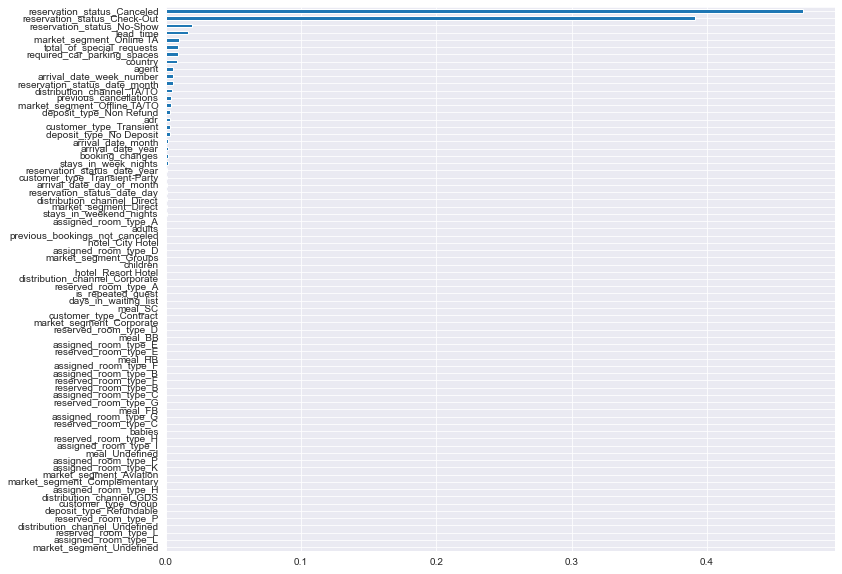

In [39]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
feature_importances.sort_values().plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=10);

### 参数优化 
我们选择放弃dummy classifier 的hyperparameter tuning，只tuned logistic regression， KNN

In [40]:
#hyperameter tuning for logistic regression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['lbfgs','liblinear']}
cv_lr = GridSearchCV(LogisticRegression(),
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10,
                      n_jobs=-1,
                      refit=True)




%time cv_lr.fit(X_train,y_train)     
print(cv_lr.best_params_)

#总共花费26秒

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zhesha

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_select

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zhesha

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_select

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_select

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zheshao/

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zheshao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

CPU times: user 1.76 s, sys: 1.31 s, total: 3.07 s
Wall time: 26.6 s
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cv_lr.best_estimator_,X_train,y_train,cv=10)
print(f'{np.mean(scores):0.2f} +- {2*np.std(scores):0.2f}')

1.00 +- 0.00


In [42]:
### model Evaluation
### draw roc curve and confusion matrix



In [43]:
#hyperameter tuning for KNN
from sklearn.model_selection import GridSearchCV
knn_leaf_size = [1,5,10,15,20,30,40,50]
knn_n_neighbors = [1,5,10,15,20,30]
params = dict(leaf_size=knn_leaf_size, 
              n_neighbors=knn_n_neighbors)
cv_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      refit=True,
                      verbose=10)


%time cv_knn.fit(X_train,y_train)     
print(cv_knn.best_params_)
#480个fit,总共21分钟

Fitting 10 folds for each of 48 candidates, totalling 480 fits
CPU times: user 2.12 s, sys: 4.16 s, total: 6.28 s
Wall time: 21min 45s
{'leaf_size': 1, 'n_neighbors': 1}


In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cv_knn.best_estimator_,X_train,y_train,cv=10,scoring='accuracy')
print(f'{np.mean(scores):0.2f} +- {2*np.std(scores):0.2f}')

0.80 +- 0.01


In [45]:
### model Evaluation
### draw roc curve and confusion matrix


In [46]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8]}

cv_rf= GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring = 'roc_auc',
    n_jobs =-1,
    cv = 10,
    verbose=10
)

%time cv_rf.fit(X_train,y_train)     
print(cv_rf.best_params_)
#总共58秒

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 2.03 s, sys: 420 ms, total: 2.45 s
Wall time: 58.6 s
{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cv_rf.best_estimator_,X_train,y_train,cv=10,scoring='accuracy')
print(f'{np.mean(scores):0.2f} +- {2*np.std(scores):0.2f}')

1.00 +- 0.00


In [48]:
### model Evaluation
### draw roc curve and confusion matrix


### evaluation on test set

In [49]:
#use best parameter on test set




In [50]:
###model evaluation
## draw roc curve and confusion matrix



### conclusion, 完成ppt就行了